Importing Packages and Data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
from datetime import datetime 
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore') 

In [4]:
df = pd.read_csv("/Users/moyma/Documents/Exploratory Analytics/Crime_Data_Minneapolis.csv")

Data Cleaning and Transformation

In [5]:
df.columns

Index(['X', 'Y', 'Type', 'Case_Number', 'Case_NumberAlt', 'Reported_Date',
       'Occurred_Date', 'NIBRS_Crime_Against', 'NIBRS_Group', 'NIBRS_Code',
       'Offense_Category', 'Offense', 'Problem_Initial', 'Problem_Final',
       'Address', 'Precinct', 'Neighborhood', 'Ward', 'Latitude', 'Longitude',
       'wgsXAnon', 'wgsYAnon', 'Crime_Count', 'OBJECTID'],
      dtype='object')

In [6]:
'Occurred_Date', 'Offense_Category' 'Neighborhood' "Precinct" 'Ward'

('Occurred_Date', 'Offense_CategoryNeighborhoodPrecinctWard')

In [6]:
df.drop(columns = ['X','Y','Type', 'Case_Number', 'Case_NumberAlt', 'Reported_Date',
       'NIBRS_Crime_Against', 'NIBRS_Group', 'NIBRS_Code',
       'Offense', 'Problem_Initial', 'Problem_Final',
       'Address' , 'Latitude', 'Longitude',
       'wgsXAnon', 'wgsYAnon', 'Crime_Count', 'OBJECTID'],axis =1, inplace = True)

In [7]:
df

,Occurred_Date,Offense_Category,Precinct,Neighborhood,Ward
0,2019/01/06 16:40:00+00,Subset of NIBRS Assault Offenses,3.0,Midtown Phillips,9.0
1,2019/01/21 02:25:00+00,Subset of NIBRS Assault Offenses,4.0,Near - North,5.0
2,2019/02/03 23:52:00+00,Subset of NIBRS Assault Offenses,4.0,Hawthorne,5.0
3,2019/02/04 22:27:00+00,Subset of NIBRS Assault Offenses,4.0,Webber - Camden,4.0
4,2019/02/06 12:00:00+00,Subset of NIBRS Assault Offenses,5.0,Whittier,10.0
...,...,...,...,...,...
217065,2023/02/25 21:57:01+00,Shots Fired Calls,4.0,Hawthorne,5.0
217066,2023/02/26 03:35:59+00,Shots Fired Calls,4.0,Webber - Camden,4.0
217067,2023/02/27 22:15:39+00,Shots Fired Calls,2.0,Holland,1.0
217068,2023/02/28 00:49:45+00,Shots Fired Calls,4.0,Folwell,4.0


In [8]:
#doing it on a city level first
df1 = df.drop(columns = ['Precinct', 'Neighborhood', 'Ward'])

In [9]:
df1.head()

,Occurred_Date,Offense_Category
0,2019/01/06 16:40:00+00,Subset of NIBRS Assault Offenses
1,2019/01/21 02:25:00+00,Subset of NIBRS Assault Offenses
2,2019/02/03 23:52:00+00,Subset of NIBRS Assault Offenses
3,2019/02/04 22:27:00+00,Subset of NIBRS Assault Offenses
4,2019/02/06 12:00:00+00,Subset of NIBRS Assault Offenses


In [10]:
df1['Date'] = pd.to_datetime(df1['Occurred_Date']).dt.date
df1.drop(['Occurred_Date'], axis = 1, inplace = True)

In [11]:
df1

,Offense_Category,Date
0,Subset of NIBRS Assault Offenses,2019-01-06
1,Subset of NIBRS Assault Offenses,2019-01-21
2,Subset of NIBRS Assault Offenses,2019-02-03
3,Subset of NIBRS Assault Offenses,2019-02-04
4,Subset of NIBRS Assault Offenses,2019-02-06
...,...,...
217065,Shots Fired Calls,2023-02-25
217066,Shots Fired Calls,2023-02-26
217067,Shots Fired Calls,2023-02-27
217068,Shots Fired Calls,2023-02-28


In [12]:
#unique types of offense #27 unique crimes
len(df1['Offense_Category'].unique().tolist())
#could also do df1.Offense_Category.value_counts().count()

27

In [13]:
df1["Offense_Category"].value_counts()

Larceny/Theft Offenses                       52895
Shots Fired Calls                            35589
Assault Offenses                             31915
Destruction/Damage/Vandalism of Property     21435
Motor Vehicle Theft                          19181
Burglary/Breaking & Entering                 12821
Fraud Offenses                                8426
Robbery                                       7353
Drug/Narcotic Offenses                        6155
Weapon Law Violations                         5407
Subset of NIBRS Assault Offenses              3604
Sex Offenses                                  3268
Stolen Property Offenses                      1934
Gunshot Wound Victims                         1725
Subset of NIBRS Robbery                       1415
Counterfeiting/Forgery                        1317
Kidnapping/Abduction                           821
Pornography/Obscene Material                   503
Arson                                          445
Homicide Offenses              

In [14]:
dates = pd.pivot_table(df1, index = ['Date'], aggfunc = 'count')

In [15]:
dates #occured dates range from 1922 to 2023 because it can be reported much later. I'll take the last 5 years

,Offense_Category
Date,
1922-01-09,1
1922-08-20,1
1961-09-01,1
1975-01-01,1
1982-01-01,1
...,...
2023-02-26,103
2023-02-27,123
2023-02-28,93


In [17]:
#creating a list of all dates in last 5 years
idx = pd.date_range('2019-03-02', '2023-03-02')

In [19]:
dates.head()

,Offense_Category
Date,
1922-01-09,1
1922-08-20,1
1961-09-01,1
1975-01-01,1
1982-01-01,1


In [20]:
dates = dates.reindex(idx, fill_value = 0)
dates

,Offense_Category
2019-03-02,87
2019-03-03,66
2019-03-04,98
2019-03-05,87
2019-03-06,77
...,...
2023-02-26,103
2023-02-27,123
2023-02-28,93
2023-03-01,113


In [21]:
#rename column
dates = dates.rename(columns = {'Offense_Category':'Occurances'})

In [22]:
dates

,Occurances
2019-03-02,87
2019-03-03,66
2019-03-04,98
2019-03-05,87
2019-03-06,77
...,...
2023-02-26,103
2023-02-27,123
2023-02-28,93
2023-03-01,113


Time Series Analysis

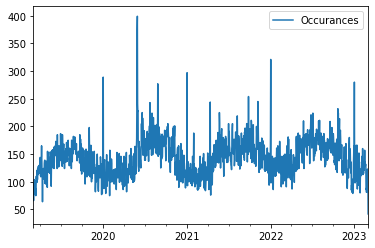

In [36]:
#Step 1: Visualize the data
from matplotlib import pyplot
# lets visualize the data over the entire available time period

dates.plot()
pyplot.show()
#looks like maybe 

In [37]:
#Step2: Use ADF to check stationarity
from statsmodels.tsa.stattools import adfuller
#series = read_csv('daily-total-female-births.csv', header=0, index_col=0, squeeze=True)
#X = series.values
result = adfuller(dates)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
#with a p-value of < 0.05, I can reject the null hypothesis. Thus, the time series is stationary.

ADF Statistic: -3.149144
p-value: 0.023124
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


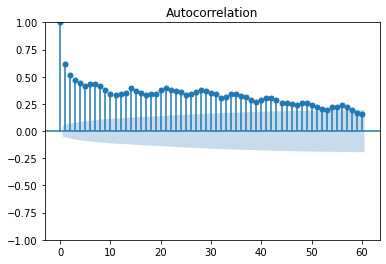

In [38]:
#Step 3: Plot ACF and PACF
#Because it is stationary, I can now check ACF and PACF to see if the time series is purely AR or purely MA model
#semi-colon is used to prevent the graph from being displayed twice
plot_acf(dates, lags = 60);

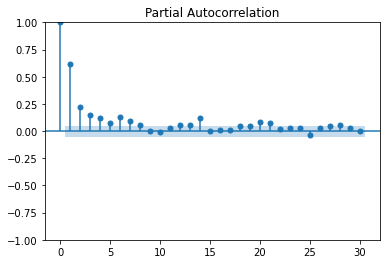

In [39]:
plot_pacf(dates, lags = 30);

In [ ]:
#both seem to train off, so it is looking like ARMA model

In [41]:
#Using auto.arima() to find the best model

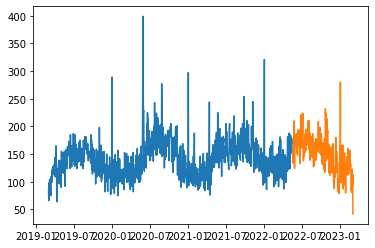

In [43]:
train = dates[:1170]
test = dates[1171:]
plt.plot(train)
plt.plot(test)

In [ ]:
#Using the Auto.arima function 
arima_model = auto_arima(train, start_p = 0, d=1, start_q=0,
                        max_p = 5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12,
                        seasonal = True, error_action = 'warn', trace = True,
                        suppress_warnings =True, stepwise = True, random_state =20,
                        n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=11940.253, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11410.578, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=11800.852, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=11281.278, Time=0.80 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=11193.790, Time=1.68 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=11178.184, Time=3.27 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=11142.455, Time=6.37 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=16.63 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=21.27 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=11289.094, Time=5.32 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=11069.777, Time=8.18 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=11109.331, Time=4.96 sec
 ARIMA(2,1,0)(5,1,1)[12]             : AIC=inf, Time=28.51 sec
 ARIMA(2,1,0)(4,1,1)[12]  

The best model in terms of AIC is ARIMA(5,1,1)(5,1,0)[12] which is much more expensive than a basic ARMA model in terms
of number of parameters. However, AIC does penalize the model complexity in terms of number of parameters. 
Comparing this to my R analysis, the ARIMA(5,1,1)(5,1,0)[12] greatly outperforms the best R model, ARIMA(2,0,1) when comparing the AIC.  ARIMA(5,1,1)(5,1,0)[12] has an AIC of 10,036 whereas the ARIMA(2,0,1) has an AIC of 13,492.